In [1]:
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from sklearn.externals import joblib
%matplotlib inline

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
catalog = np.loadtxt("/Users/tktakaro/Documents/Type-Iax-HST/images/sn2010el/sn2010el.phot")

In [3]:
pos_predict = np.zeros((catalog.shape[0],2))
info_predict = np.zeros(np.shape(catalog))

j = 0 # Iteration variable for positions array
for i in range(catalog.shape[0]): # Cycles through each object in catalog
    # Checks to make sure point is "good"
    # Good defined by: 1. S/N > 3.5     2. Sharpness < .25     3. Roundness < 1     4. Crowding < .1 
    #                  5. Object type = "Bright Star"
    if ((catalog[i][5] >= 3.5)&(abs(catalog[i][6]) < .25)&(abs(catalog[i][7]) < 1)
        &(catalog[i][9] < .1)&(catalog[i][10] == 1)):
        pos_predict[j][0] = catalog[i][2] # Assigns X position
        pos_predict[j][1] = catalog[i][3] # Assigns Y position
        info_predict[j] = catalog[i]
        j = j + 1
                
# Trims all zeros from end of positions array, left from "bad" objects
pos_predict = pos_predict[~np.all(pos_predict == 0, axis=1)]
info_predict = info_predict[~np.all(info_predict == 0, axis=1)]

# Saves high S/N object X,Y positions
np.savetxt("New_Start(2017)/sn2010el_FirstPrediction.reg", pos_predict, '%5.2f')

# Load in stars in ROI identified by eye as good and create CMDs

In [4]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2010el_200pc.reg", "r+")

def mysplit(s, delim=None):
    return [x for x in s.split(delim) if x]

text = asci.readlines()
region = np.zeros([280,2])
for i in range(280):
    A = mysplit(text[i+3], ' # ')
    if A[1][-2] == 'w':
        region[i][0] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
        region[i][1] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]
region = region[~np.all(region == 0, axis=1)]

# Info for each star chosen as real 
infoF3 = np.zeros([region.shape[0],info_predict.shape[1]])

j = 0 # Iteration variable for region array
for i in range(info_predict.shape[0]): # Cycles through each star predicted above
    if (pos_predict[i][0] > 2260)&(pos_predict[i][0] < 2569)&(pos_predict[i][1] > 1417)&(pos_predict[i][1] < 1726):
        if (region[j][0] == pos_predict[i][0])&(region[j][1] == pos_predict[i][1]):
            infoF3[j] = info_predict[i]
            j = j + 1
            if j == region.shape[0]: break

In [5]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2010el_133pc.reg", "r+")

text = asci.readlines()
region = np.zeros([122,2])
for i in range(122):
    A = mysplit(text[i+3], ' # ')
    if A[1][-2] == 'w':
        region[i][0] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
        region[i][1] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]
region = region[~np.all(region == 0, axis=1)]

infoF2 = np.zeros([region.shape[0], info_predict.shape[1]])

j = 0 # Iteration variable for region array
for i in range(infoF3.shape[0]): # Cycles through each star predicted above
    if (infoF3[i][2] > 2260)&(infoF3[i][2] < 2569)&(infoF3[i][3] > 1417)&(infoF3[i][1] < 1726):
        if (region[j][0] == infoF3[i][2])&(region[j][1] == infoF3[i][3]):
            infoF2[j] = infoF3[i]
            j = j + 1
            if j == region.shape[0]: break

In [6]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2010el_67pc.reg", "r+")

text = asci.readlines()
region = np.zeros([31,2])
for i in range(31):
    A = mysplit(text[i+3], ' # ')
    if A[1][-2] == 'w':
        region[i][0] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
        region[i][1] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]
region = region[~np.all(region == 0, axis=1)]

infoF1 = np.zeros([region.shape[0], info_predict.shape[1]])

j = 0 # Iteration variable for region array
for i in range(infoF2.shape[0]): # Cycles through each star predicted above
    if (infoF2[i][2] > 2260)&(infoF2[i][2] < 2569)&(infoF2[i][3] > 1417)&(infoF2[i][1] < 1726):
        if (region[j][0] == infoF2[i][2])&(region[j][1] == infoF2[i][3]):
            infoF1[j] = infoF2[i]
            j = j + 1
            if j == region.shape[0]: break

[-0.6, 4.1, 29, 22]

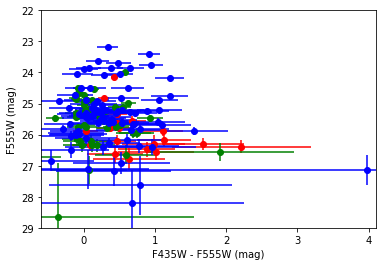

In [7]:
for i in range(infoF3.shape[0]):
    for j in range(infoF2.shape[0]):
        if np.array_equal(infoF3[i],infoF2[j]):
            infoF3[i] = np.zeros(infoF3[i].size)
for i in range(infoF2.shape[0]):
    for j in range(infoF1.shape[0]):
        if np.array_equal(infoF2[i],infoF1[j]):
            infoF2[i] = np.zeros(infoF2[i].size)

infoF2 = infoF2[~np.all(infoF2 == 0, axis=1)]
infoF3 = infoF3[~np.all(infoF3 == 0, axis=1)]
# F555W vs F435W - F555W
F435W_F1 = infoF1[:,15]
xerr_F1 = np.sqrt(infoF1[:,17]**2 + infoF1[:,30]**2)
F555W_F1 = infoF1[:,28]
yerr_F1 = infoF1[:,30]

F435W_F2 = infoF2[:,15]
xerr_F2 = np.sqrt(infoF2[:,17]**2 + infoF2[:,30]**2)
F555W_F2 = infoF2[:,28]
yerr_F2 = infoF2[:,30]

F435W_F3 = infoF3[:,15]
xerr_F3 = np.sqrt(infoF3[:,17]**2 + infoF3[:,30])
F555W_F3 = infoF3[:,28]
yerr_F3 = infoF3[:,30]

line1 = plt.errorbar(F435W_F1 - F555W_F1, F555W_F1, fmt='ro', xerr=xerr_F1, yerr=yerr_F1)
line2 = plt.errorbar(F435W_F2 - F555W_F2, F555W_F2, fmt='go', xerr=xerr_F2, yerr=yerr_F2)
line3 = plt.errorbar(F435W_F3 - F555W_F3, F555W_F3, fmt='bo', xerr=xerr_F3, yerr=yerr_F3)

#plt.plot(F435W_F1 - F555W_F1, F555W_F1, 'ro', F435W_F2 - F555W_F2, F555W_F2, 'go', F435W_F3 - F555W_F3, F555W_F3, 'bo')
plt.gca().invert_yaxis()
plt.xlabel('F435W - F555W (mag)')
plt.ylabel('F555W (mag)')
plt.axis([-.6,4.1,29,22])

[-1, 3, 27, 22]

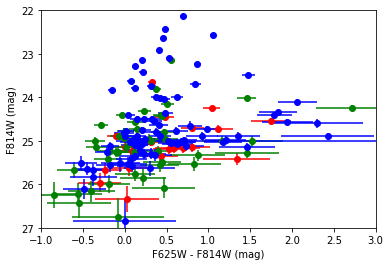

In [8]:
F625W_F1 = infoF1[:,41]
xerr2_F1 = np.sqrt(infoF1[:,43]**2 + infoF1[:,56]**2)
F814W_F1 = infoF1[:,54]
yerr2_F1 = infoF1[:,56]

F625W_F2 = infoF2[:,41]
xerr2_F2 = np.sqrt(infoF2[:,43]**2 + infoF2[:,56]**2)
F814W_F2 = infoF2[:,54]
yerr2_F2 = infoF2[:,56]

F625W_F3 = infoF3[:,41]
xerr2_F3 = np.sqrt(infoF3[:,43]**2 + infoF3[:,56]**2)
F814W_F3 = infoF3[:,54]
yerr2_F3 = infoF3[:,56]

line1 = plt.errorbar(F625W_F1 - F814W_F1, F814W_F1, fmt='ro', xerr=xerr2_F1, yerr=yerr2_F1)
line2 = plt.errorbar(F625W_F2 - F814W_F2, F814W_F2, fmt='go', xerr=xerr2_F2, yerr=yerr2_F2)
line3 = plt.errorbar(F625W_F3 - F814W_F3, F814W_F3, fmt='bo', xerr=xerr2_F3, yerr=yerr2_F3)

#plt.plot(F625W_F1 - F814W_F1, F814W_F1, 'ro', F625W_F2 - F814W_F2, F814W_F2, 'go', F625W_F3 - F814W_F3, F814W_F3, 'bo')
plt.gca().invert_yaxis()
plt.xlabel('F625W - F814W (mag)')
plt.ylabel('F814W (mag)')
plt.axis([-1,3,27,22])

In [9]:
import os
import glob
import matplotlib as mpl

mist_dir = "/Users/tktakaro/Documents/Type-Iax-HST/MIST_v1.0_HST_ACSWF"
# All of this MIST isochrone code comes from Asher

In [10]:
kwargs = {"names": ["EEP", "log10_isochrone_age_yr", "initial_mass", "log_Teff", "log_g",
                    "log_L", "z_surf", "ACS_WFC_F435W", "ACS_WFC_F475W", "ACS_WFC_F502N",
                    "ACS_WFC_F550M", "ACS_WFC_F555W", "ACS_WFC_F606W", "ACS_WFC_F625W", 
                    "ACS_WFC_F658N", "ACS_WFC_F660N", "ACS_WFC_F775W", "ACS_WFC_F814W",
                    "ACS_WFC_F850LP", "ACS_WFC_F892N", "phase"],
         "delim_whitespace": True, "comment": "#"}
isochrones = {}
for filename in glob.glob(mist_dir + "/*.iso.cmd"):
    feh_string = filename.split("/")[-1].split("_")[3] # Pulls metalicity information
    if feh_string[0] == "p":
        feh = float(feh_string[1:]) # feh is [Fe/H]
    elif feh_string[0] == "m":
        feh = -float(feh_string[1:])
    else:
        raise ValueError
    df = pandas.read_csv(filename, **kwargs)
    df['ages'] = 10 ** df.log10_isochrone_age_yr / 1e9
    isochrones[feh] = df # Creates dictionary accessible by entering a particular metalicity

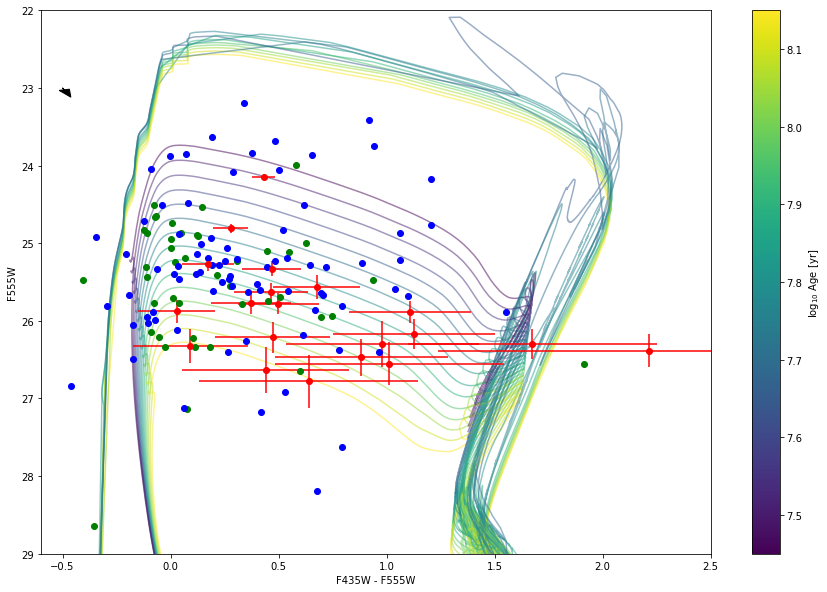

In [11]:
# fix metallicity, vary age
df = isochrones[0.50]
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()

age_cmd = {}

ages = ages[(ages > 7.4) & (ages < 8.2)]
for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    # Three adjustments: 1. Distance: added to mag 2. MW Extinction: added to both. 3. Galactic extinction
    dist_adjust = 5 * (np.log10(5.63e6) - 1)
    F435W_ext = 0.033 # extinction in F435W in NGC 1566 from NED
    F555W_ext = 0.025 # extinction in F555W in NGC 1566 from NED
    Gal_ext = 0
    # Multiply Gal_ext by A_lambda/E(B-V) values from Schlafly, Finkbeiner 2011
    mag = df[idx].ACS_WFC_F555W + dist_adjust + F555W_ext + 2.792*Gal_ext
    color = df[idx].ACS_WFC_F435W - df[idx].ACS_WFC_F555W  + F435W_ext - F555W_ext + (3.610 - 2.792) * Gal_ext
    age_cmd[age] = (color, mag)

norm = mpl.colors.Normalize(vmin=ages.min(), vmax=ages.max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
sm.set_array(ages)
plt.subplots(figsize=(15, 10))
for age, (color, mag) in age_cmd.items():
    plt.plot(color, mag, alpha=0.5, color=sm.to_rgba(age), zorder=0)
# Plots stars
line1 = plt.errorbar(F435W_F1 - F555W_F1, F555W_F1, fmt='ro', xerr=xerr_F1, yerr=yerr_F1)
#line2 = plt.errorbar(F435W_F2 - F555W_F2, F555W_F2, fmt='go', xerr=xerr_F2, yerr=yerr_F2)
line2 = plt.plot(F435W_F2 - F555W_F2, F555W_F2, 'go')
#line3 = plt.errorbar(F435W_F3 - F555W_F3, F555W_F3, fmt='bo', xerr=xerr_F3, yerr=yerr_F3)
line3 = plt.plot(F435W_F3 - F555W_F3, F555W_F3, 'bo')
#plt.plot(F435W_F1 - F555W_F1, F555W_F1, 'ro', F435W_F2 - F555W_F2, F555W_F2, 'go', F435W_F3 - F555W_F3, F555W_F3, 'bo')
# Plots reddening vector
plt.arrow(-0.5, 23, F435W_ext - F555W_ext + (3.610 - 2.792)*Gal_ext, F555W_ext + 2.792*Gal_ext,
          head_width=0.05, head_length=0.1, fc='k', ec='k')

plt.xlabel("F435W - F555W")
plt.ylabel("F555W")
plt.ylim(29,22)
plt.xlim(-.6, 2.5)
cb = plt.colorbar(sm)
cb.set_label('$\log_{10}$ Age [yr]')
plt.draw()
plt.show()

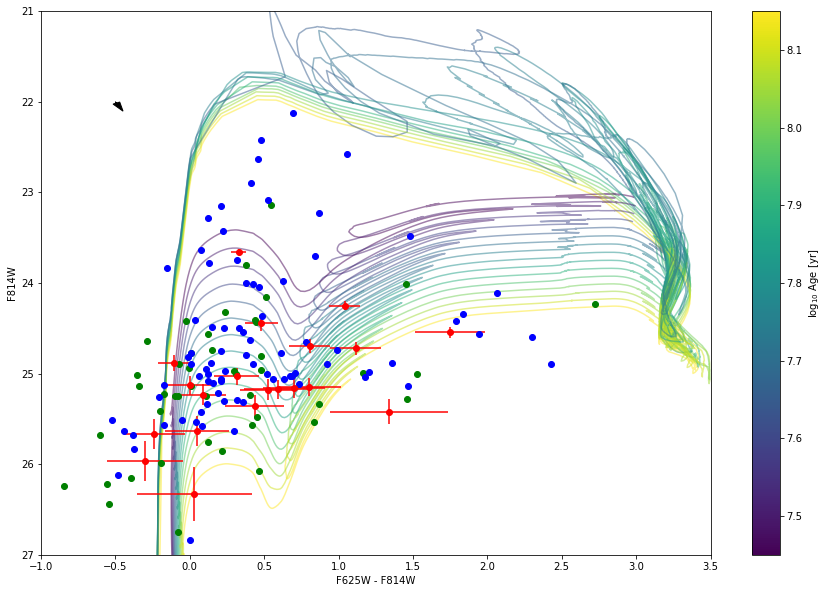

In [12]:
# fix metallicity, vary age
df = isochrones[0.50]
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()

age_cmd = {}


ages = ages[(ages > 7.4) & (ages < 8.2)]
for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    # Two adjustments: 1. Distance: added to mag 2. Extinction: added to both.
    F625W_ext = .021 # extinction in F625W in NGC 1566 from NED
    F814W_ext = .014 # extinction in F814W in NGC 1566 from NED
    mag = df[idx].ACS_WFC_F814W + dist_adjust + F814W_ext + 1.526*Gal_ext
    color = df[idx].ACS_WFC_F625W - df[idx].ACS_WFC_F814W + F625W_ext - F814W_ext + (2.219 - 1.526)*Gal_ext
    age_cmd[age] = (color, mag)

norm = mpl.colors.Normalize(vmin=ages.min(), vmax=ages.max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
sm.set_array(ages)
plt.subplots(figsize=(15, 10))
for age, (color, mag) in age_cmd.items():
    plt.plot(color, mag, alpha=0.5, color=sm.to_rgba(age), zorder=0)
# Plots stars
line1 = plt.errorbar(F625W_F1 - F814W_F1, F814W_F1, fmt='ro', xerr=xerr2_F1, yerr=yerr2_F1)
#line2 = plt.errorbar(F625W_F2 - F814W_F2, F814W_F2, fmt='go', xerr=xerr2_F2, yerr=yerr2_F2)
line2 = plt.plot(F625W_F2 - F814W_F2, F814W_F2, 'go')
#line3 = plt.errorbar(F625W_F3 - F814W_F3, F814W_F3, fmt='bo', xerr=xerr2_F3, yerr=yerr2_F3)
line3 = plt.plot(F625W_F3 - F814W_F3, F814W_F3, 'bo')
#plt.plot(F625W_F1 - F814W_F1, F814W_F1, 'ro', F625W_F2 - F814W_F2, F814W_F2, 'go', F625W_F3 - F814W_F3, F814W_F3, 'bo')
# Plots reddening vector
plt.arrow(-0.5, 22, F625W_ext - F814W_ext + (2.219 - 1.526)*Gal_ext, F814W_ext + 1.526*Gal_ext,
          head_width=0.05, head_length=0.1, fc='k', ec='k')

plt.xlabel("F625W - F814W")
plt.ylabel("F814W")
plt.ylim(27,21)
plt.xlim(-1, 3.5)
cb = plt.colorbar(sm)
cb.set_label('$\log_{10}$ Age [yr]')

# Attempt to remove clusters by identifying "concentration index"

In [99]:
# Using IRAF to compute actual concentration index, i.e. photometry at .5 pixels to photometry at 3 pixels
ascii_1 = open("/Users/tktakaro/Documents/Type-Iax-HST/images/sn2010el/sn2010el_acs_f625w_lacosmic.fits.mag.4")
ascii_2 = open("/Users/tktakaro/Documents/Type-Iax-HST/images/sn2010el/sn2010el_acs_f625w_lacosmic.fits.mag.5")
text_1 = ascii_1.readlines()
text_2 = ascii_2.readlines()

concentration = np.zeros(280)
for i in range(280):
    if mysplit(text_1[5*i + 79])[4] == 'INDEF': # Removes objects with no defined magnitude at .5 pixels
        concentration[i] = 99
    elif mysplit(text_2[5*i + 79])[4] == 'INDEF': # Removes objects with no defined magnitude at 3 pixels
        concentration[i] = -99
    else: concentration[i] = float(mysplit(text_1[5*i + 79])[4]) - float(mysplit(text_2[5*i + 79])[4])
ascii_1.close()
ascii_2.close()

In [100]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2010el_200pc.reg", "r+")
text = asci.readlines()

region = np.zeros([280,2])
for i in range(280):
    A = mysplit(text[i+3], ' # ')
    region[i][0] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
    region[i][1] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]

# Info for each star chosen as real 
info = np.zeros([region.shape[0],info_predict.shape[1]])

j = 0 # Iteration variable for region array
for i in range(info_predict.shape[0]): # Cycles through each star predicted above
    if (pos_predict[i][0] > 2260)&(pos_predict[i][0] < 2569)&(pos_predict[i][1] > 1417)&(pos_predict[i][1] < 1726):
        if (region[j][0] == pos_predict[i][0])&(region[j][1] == pos_predict[i][1]):
            info[j] = info_predict[i]
            j = j + 1
            if j == region.shape[0]: break

(28, 21)

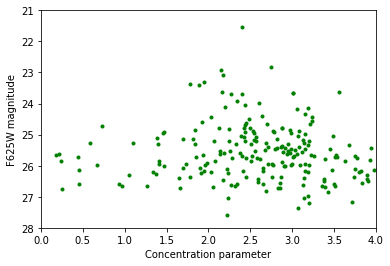

In [101]:
# Plots the concentration parameter vs magnitude
plt.plot(concentration, info[:,41], 'g.')
plt.xlabel('Concentration parameter')
plt.ylabel('F625W magnitude')
plt.xlim(0,4)
plt.ylim(28,21)

In [143]:
# Cut out clusters (identified as objects with concentration parameter < 2.3, from Chandar et. al. 2010)
new_info = np.zeros(info.shape)
for i in range(280):
    if (concentration[i] < 2.3): # & (concentration[i] >= 0):
        new_info[i] = info[i]
new_info = new_info[~np.all(new_info == 0, axis=1)]

In [183]:
np.savetxt("New_Start(2017)/sn2010el_NoClustersROI.reg", new_info[:,2:4], '%5.2f')

In [148]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2010el_NoClustersROI_133pc.reg", "r+")
text = asci.readlines()
region = np.zeros([80,2])

for i in range(42): #24 with the lower cutoff in concentration
    region[i][0] = mysplit(text[i])[0]
    region[i][1] = mysplit(text[i])[1]
region = region[~np.all(region == 0, axis=1)]

new_info1 = np.copy(new_info) # Will hold stars within 200 parsecs
new_info2 = np.zeros([region.shape[0], new_info.shape[1]]) # Will hold stars within 133 parsecs
new_info3 = np.zeros([region.shape[0], new_info.shape[1]]) # Will hold stars within 67 parsecs

j = 0 # Iteration variable for region array
for i in range(new_info1.shape[0]): # Cycles through each star predicted above
    if (new_info1[i][2] > 2260)&(new_info1[i][2] < 2569)&(new_info1[i][3] > 1417)&(new_info1[i][1] < 1726):
        if (region[j][0] == new_info1[i][2])&(region[j][1] == new_info1[i][3]):
            new_info2[j] = new_info1[i]
            j = j + 1
            if j == region.shape[0]: break

asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2010el_NoClustersROI_67pc.reg", "r+")
text = asci.readlines()
region = np.zeros([16,2])

for i in range(15):
    region[i][0] = mysplit(text[i])[0]
    region[i][1] = mysplit(text[i])[1]
region = region[~np.all(region == 0, axis=1)]


j = 0 # Iteration variable for region array
for i in range(new_info1.shape[0]): # Cycles through each star predicted above
    if (new_info1[i][2] > 2260)&(new_info1[i][2] < 2569)&(new_info1[i][3] > 1417)&(new_info1[i][1] < 1726):
        if (region[j][0] == new_info1[i][2])&(region[j][1] == new_info1[i][3]):
            new_info3[j] = new_info1[i]
            j = j + 1
            if j == region.shape[0]: break
                

for i in range(new_info1.shape[0]):
    for j in range(new_info2.shape[0]):
        if np.array_equal(new_info1[i],new_info2[j]):
            new_info1[i] = np.zeros(new_info1[i].size)
for i in range(new_info2.shape[0]):
    for j in range(new_info3.shape[0]):
        if np.array_equal(new_info2[i],new_info3[j]):
            new_info2[i] = np.zeros(new_info2[i].size)
            
new_info1 = new_info1[~np.all(new_info1 == 0, axis=1)]
new_info2 = new_info2[~np.all(new_info2 == 0, axis=1)]
new_info3 = new_info3[~np.all(new_info3 == 0, axis=1)]

# Now plot new isochrones!

In [106]:
# Reddening, metallicity, and distance errors
dist_lower = 5 * (np.log10(4.51e6) - 1)
dist_upper = 5 * (np.log10(6.70e6) - 1)
red_lower = 0
red_upper = 0
metal_lower = 0.50
metal_upper = 0.50

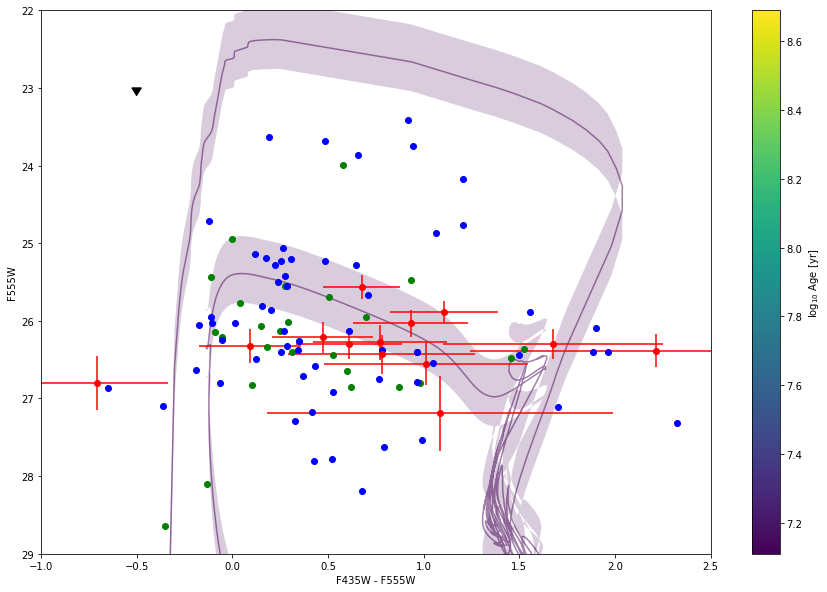

In [107]:
# fix metallicity, vary age
df = isochrones[0.50]
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()

age_cmd = {}

ages = ages[(ages > 7.85) & (ages < 7.95)]
for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    # Three adjustments: 1. Distance: added to mag 2. MW Extinction: added to both. 3. Galactic extinction
    dist_adjust = 5 * (np.log10(5.63e6) - 1)
    F435W_ext = 0.033 # extinction in F435W in NGC 1566 from NED
    F555W_ext = 0.025 # extinction in F555W in NGC 1566 from NED
    Gal_ext = 0
    # Multiply Gal_ext by A_lambda/E(B-V) values from Schlafly, Finkbeiner 2011
    mag = df[idx].ACS_WFC_F555W + dist_adjust + F555W_ext + 2.792*Gal_ext
    color = df[idx].ACS_WFC_F435W - df[idx].ACS_WFC_F555W  + F435W_ext - F555W_ext + (3.610 - 2.792) * Gal_ext
    mag_lower = df[idx].ACS_WFC_F555W + dist_lower + F555W_ext + 2.792*red_lower
    mag_upper = df[idx].ACS_WFC_F555W + dist_upper + F555W_ext + 2.792*red_upper
    age_cmd[age] = (color, mag, mag_lower, mag_upper)

norm = mpl.colors.Normalize(vmin=ages.min(), vmax=ages.max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
sm.set_array(ages)
plt.subplots(figsize=(15, 10))
for age, (color, mag, mag_lower, mag_upper) in age_cmd.items():
    plt.plot(color, mag, alpha=0.5, color=sm.to_rgba(age), zorder=0)
    plt.fill_between(color, mag_lower, mag_upper, facecolor=sm.to_rgba(age), alpha=0.2, edgecolor='none')
    
# Plots stars
line1 = plt.errorbar(new_info3[:,15] - new_info3[:,28], new_info3[:,28], fmt='ro', 
                     xerr=np.sqrt(new_info3[:,17]**2 + new_info3[:,30]**2), yerr=new_info3[:,30])
#line2 = plt.errorbar(new_info2[:,15] - new_info2[:,28], new_info2[:,28], fmt='go', 
#                     xerr=np.sqrt(new_info2[:,17]**2 + new_info2[:,30]**2), yerr=new_info2[:,30])
line2 = plt.plot(new_info2[:,15] - new_info2[:,28], new_info2[:,28], 'go')
#line3 = plt.errorbar(new_info[:,15] - new_info[:,28], new_info[:,28], fmt='bo', 
#                     xerr=np.sqrt(new_info[:,17]**2 + new_info[:,30]**2), yerr=new_info[:,30])
line3 = plt.plot(new_info1[:,15] - new_info1[:,28], new_info1[:,28], 'bo')

# Plots reddening vector
plt.arrow(-0.5, 23, (3.610 - 2.792)*Gal_ext, 2.792*Gal_ext, head_width=0.05, head_length=0.1, fc='k', ec='k')

plt.xlabel("F435W - F555W")
plt.ylabel("F555W")
plt.ylim(29,22)
plt.xlim(-1, 2.5)
cb = plt.colorbar(sm)
cb.set_label('$\log_{10}$ Age [yr]')
plt.draw()
plt.show()

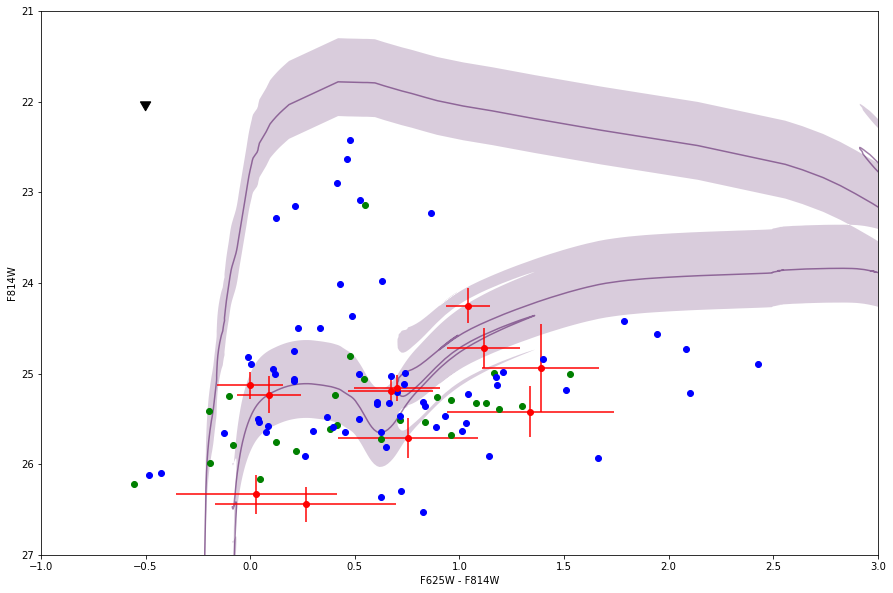

In [108]:
# fix metallicity, vary age
df = isochrones[0.50]
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()

age_cmd = {}

ages = ages[(ages > 7.85) & (ages < 7.95)]
for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    # Three adjustments: 1. Distance: added to mag 2. MW Extinction: added to both. 3. Galactic extinction
    F625W_ext = .021 # extinction in F625W in NGC 1566 from NED
    F814W_ext = .014 # extinction in F814W in NGC 1566 from NED
    # Multiply Gal_ext by A_lambda/E(B-V) values from Schlafly, Finkbeiner 2011
    mag = df[idx].ACS_WFC_F814W + dist_adjust + F814W_ext + 1.526*Gal_ext
    mag_lower = df[idx].ACS_WFC_F814W + dist_lower + F814W_ext + 1.526*red_lower
    mag_upper = df[idx].ACS_WFC_F814W + dist_upper + F814W_ext + 1.526*red_upper
    color = df[idx].ACS_WFC_F625W - df[idx].ACS_WFC_F814W + F625W_ext - F814W_ext + (2.219 - 1.526)*Gal_ext
    age_cmd[age] = (color, mag, mag_lower, mag_upper)

norm = mpl.colors.Normalize(vmin=ages.min(), vmax=ages.max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
sm.set_array(ages)
plt.subplots(figsize=(15, 10))
for age, (color, mag, mag_lower, mag_upper) in age_cmd.items():
    plt.plot(color, mag, alpha=0.5, color=sm.to_rgba(age), zorder=0)
    plt.fill_between(color, mag_lower, mag_upper, facecolor=sm.to_rgba(age), alpha=0.2, edgecolor='none')

# Plots stars
line1 = plt.errorbar(new_info3[:,41] - new_info3[:,54], new_info3[:,54], fmt='ro', 
                     xerr=np.sqrt(new_info3[:,43]**2 + new_info3[:,56]**2), yerr=new_info3[:,30])
#line2 = plt.errorbar(new_info2[:,15] - new_info2[:,28], new_info2[:,28], fmt='go', 
#                     xerr=np.sqrt(new_info2[:,17]**2 + new_info2[:,30]**2), yerr=new_info2[:,30])
line2 = plt.plot(new_info2[:,41] - new_info2[:,54], new_info2[:,54], 'go')
#line3 = plt.errorbar(new_info[:,15] - new_info[:,28], new_info[:,28], fmt='bo', 
#                     xerr=np.sqrt(new_info[:,17]**2 + new_info[:,30]**2), yerr=new_info[:,30])
line3 = plt.plot(new_info1[:,41] - new_info1[:,54], new_info1[:,54], 'bo')

# Plots reddening vector
plt.arrow(-0.5, 22, (2.219 - 1.526)*Gal_ext, 1.526*Gal_ext, head_width=0.05, head_length=0.1, fc='k', ec='k')

plt.xlabel("F625W - F814W")
plt.ylabel("F814W")
plt.ylim(27,21)
plt.xlim(-1, 3)
#cb = plt.colorbar(sm)
cb.set_label('$\log_{10}$ Age [yr]')
plt.draw()
plt.show()

## Fitting isochrones using Crappy Chi-squared test

There are  100.0 stars above signal-to-noise of 10, and  0.0 stars below.


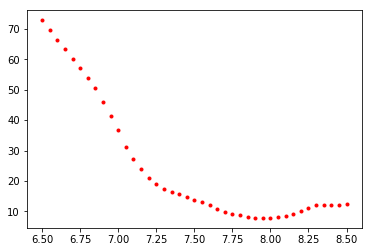

In [174]:
# Reruns through the isochrones the user specifies to get mags, colors, etc.
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()
ages = ages[(ages >= 6.5) & (ages <= 8.5)]

n_ages = 0
for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    mag_435 = df[idx].ACS_WFC_F435W + dist_adjust + F435W_ext + 3.610*Gal_ext
    mag_555 = df[idx].ACS_WFC_F555W + dist_adjust + F555W_ext + 2.792*Gal_ext
    mag_625 = df[idx].ACS_WFC_F625W + dist_adjust + F625W_ext + 2.219*Gal_ext
    mag_814 = df[idx].ACS_WFC_F814W + dist_adjust + F814W_ext + 1.526*Gal_ext
    age_cmd[age] = (mag_435, mag_555, mag_625, mag_814)
    n_ages += 1


SN_pos = np.array([2417.4288, 1571.5335]) # Sets the SN position in pixels, for radial distance weighting

CChi = np.zeros([2,n_ages]) # This is the array which measure crappy chi-squared across all filters
k = 0 # Counter for progressing through ages in loop
n10SN = 0 # Will represent stars with S/N ratio above 10
nlow = 0 # Will represent stars with S/N ratio below 10
for age, (mag_435, mag_555, mag_625, mag_814) in age_cmd.items():
    phys_dist_temp = 0 # This will hold the total physical distance weights to be averaged and divided out to normalize
    temp = 0 # This will hold the distance for each data point to the line
    
    # Sets the radial dispersion for the region
    sigma = 5 * (.92 * 10**age * 3.15e7 * 206265)/(5.63e6 * 3.086e13 * .05) # Replace 10**age w/ 10000000
    flat = (100 * 206265)/(5.63e6 * .05) # 100 parsecs in pixels
    flat_int = int(np.round(flat*5)) # Coverts the above from pixels to elements in the array
    for j in range(new_info.shape[0]):
        # Removes "stars" with mag > 90 in any band
        if (new_info[j,15] > 90) or (new_info[j,28] > 90) or (new_info[j,41] > 90) or (new_info[j,54] > 90):
            continue
        if new_info[j,5] >= 10:
            n10SN += 1
        else: nlow += 1
        
        # Uses physical distance between star and SN position to weight each star
        phys_dist = np.sqrt((SN_pos[0] - new_info[j,2])**2 + (SN_pos[1] - new_info[j,3])**2)
        # Combines a flat 100 pc distribution with the velocity dispersion over the life of the stars
        weight_func = np.convolve(1/(np.sqrt(2 * np.pi) * sigma) * np.exp(- np.linspace(-200,200,2000)**2/(2 * sigma**2)),
               np.append(np.zeros(int(np.ceil((2000-flat_int)/2))),np.append(np.ones(flat_int),np.zeros(int(np.floor((2000-flat_int)/2))))))
        phys_dist_weight = weight_func[1999 + int(phys_dist*5)]
        phys_dist_temp += phys_dist_weight # Will be used to compute average of the weights
        
        # Adds the difference in mags for each data point in quadrature.
        #temp += phys_dist_weight * np.amin((new_info[j,15] - mag_435)**2/mag_435 + (new_info[j,28] - mag_555)**2/mag_555
        #                + (new_info[j,41] - mag_625)**2/mag_625 + (new_info[j,54] - mag_814)**2/mag_814)
        temp += (phys_dist_weight * np.amin(np.sqrt((new_info[j,15] - mag_435)**2
          + (new_info[j,28] - mag_555)**2 + (new_info[j,41] - mag_625)**2 + (new_info[j,54] - mag_814)**2)))**2
    
    # Divides by the number of stars used, to get average phys_dist weight
    phys_dist_temp /= (new_info.shape[0] - 11) # There are eleven stars removed not counted, as they have >90 mag
    CChi[0,k] = age
    CChi[1,k] = np.sqrt(temp)/phys_dist_temp # Divides by the average phys_dist weight 
    k = k + 1
    
# Ensures that the crappy chi-squared arrays are ordered by age for convenience.
CChi = CChi.T[CChi.T[:,0].argsort()]
plt.plot(CChi.T[0], CChi.T[1], 'r.')
print("There are ", n10SN/n_ages, "stars above signal-to-noise of 10, and ", nlow/n_ages, "stars below.")

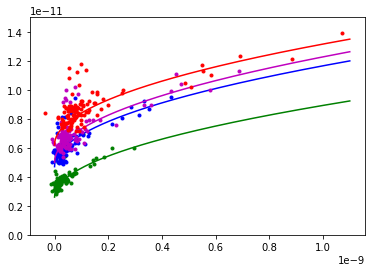

In [24]:
# Testing to find relationship between flux and flux error
x_array=np.linspace(0, 1.1e-9, num=1000)
plt.ylim(0,1.5e-11)

plt.plot(new_info[:,13], new_info[:,14], 'g.')
plt.plot(x_array, 2.6e-12 + 2e-7*np.sqrt(x_array), 'g-')
plt.plot(new_info[:,26], new_info[:,27], 'b.')
plt.plot(x_array, 4.7e-12 + 2.2e-7*np.sqrt(x_array), 'b-')
plt.plot(new_info[:,39], new_info[:,40], 'm.')
plt.plot(x_array, 5e-12 + 2.3e-7*np.sqrt(x_array), 'm-')
plt.plot(new_info[:,52], new_info[:,53], 'r.')
plt.plot(x_array, 6.2e-12 + 2.2e-7*np.sqrt(x_array), 'r-')

In [28]:
import scipy.integrate as integrate
from scipy.optimize import curve_fit
from scipy.stats import skewnorm
# This is the function which will be fed to the fitting algorithm.
def skew(x, norm, a, loc, scale):
    return norm * skewnorm.pdf(x, a, loc=loc, scale=scale)

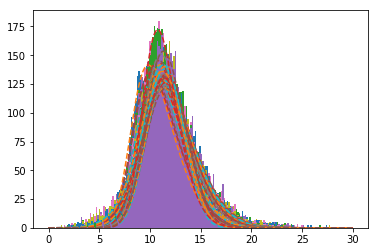

In [175]:
# This cell and the one below are for run fit in magnitude space.
x = np.linspace(0,30,200)
probs = []
for i, age in enumerate(ages):
    filename="MC_10el_MagFit/CChi_false_{Age}.npy".format(Age=np.round(age,decimals=2))
    CChi_false = np.load(filename)
    halt = False
    for j in range(5000):
        if np.isinf(CChi_false[1,j]):
            CChi_false[1,j] = 999999999999
            halt = True
            continue
    if halt == True:
        probs.append(0)
        continue
    y = plt.hist(CChi_false[1,:], bins=np.linspace(0,30,201))[0]
    popt, pcov = curve_fit(skew, x, y, p0=(2000, 4, 3, 3))
    plt.plot(x, skew(x, *popt), '--')
    norm = integrate.quad(skew, 0, 30, args=(popt[0], popt[1], popt[2], popt[3]))[0]
    probs.append(skew(CChi[i,1], *popt)/norm)

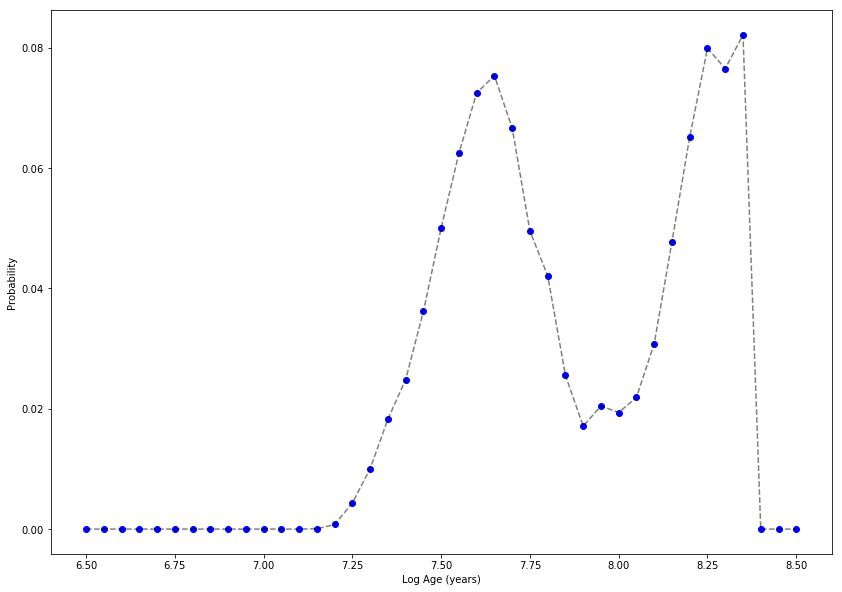

In [177]:
norm = np.sum(probs)
plt.figure(figsize=(14,10));
plt.plot(CChi[:,0], probs/norm, 'bo')
plt.plot(CChi[:,0], probs/norm, 'k--', alpha=.5)
plt.ylabel("Probability")
plt.xlabel("Log Age (years)")
np.save("New_Start(2017)/10el_Mag_probs", probs)

There are  111.0 stars above signal-to-noise of 10, and  0.0 stars below.


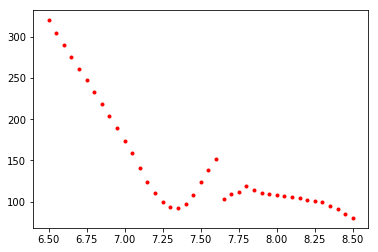

In [166]:
# Reruns through the isochrones the user specifies to get mags, colors, etc.
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()
ages = ages[(ages >= 6.5) & (ages <= 8.5)]

n_ages = 0
for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    mag_435 = df[idx].ACS_WFC_F435W + dist_adjust + F435W_ext + 3.610*Gal_ext
    mag_555 = df[idx].ACS_WFC_F555W + dist_adjust + F555W_ext + 2.792*Gal_ext
    mag_625 = df[idx].ACS_WFC_F625W + dist_adjust + F625W_ext + 2.219*Gal_ext
    mag_814 = df[idx].ACS_WFC_F814W + dist_adjust + F814W_ext + 1.526*Gal_ext
    age_cmd[age] = (mag_435, mag_555, mag_625, mag_814) #(color, mag, mag_lower, mag_upper)
    n_ages += 1


SN_pos = np.array([2417.4288, 1571.5335])

CChi = np.zeros([2,n_ages]) # This is the array which measure crappy chi-squared across all filters
k = 0
n10SN = 0
nlow = 0
for age, (mag_435, mag_555, mag_625, mag_814) in age_cmd.items():
    phys_dist_temp = 0 # This will hold the total physical distance weights to be averaged and divided out to normalize
    temp = 0 # This will hold the distance for each data point to the line
    
    # Sets the radial dispersion for the region
    sigma = 5 * (.92 * 10**age * 3.15e7 * 206265)/(5.63e6 * 3.086e13 * .05) # Replace 10**age w/ 10000000
    flat = (100 * 206265)/(5.63e6 * .05) # 100 parsecs in pixels
    flat_int = int(np.round(flat*5))
    for j in range(new_info.shape[0]):
        if new_info[j,5] >= 10:
            n10SN += 1
        else: nlow += 1
        
        # Uses physical distance between star and SN position to weight each star
        phys_dist = np.sqrt((SN_pos[0] - new_info[j,2])**2 + (SN_pos[1] - new_info[j,3])**2)
        weight_func = np.convolve(1/(np.sqrt(2 * np.pi) * sigma) * np.exp(- np.linspace(-200,200,2000)**2/(2 * sigma**2)),
               np.append(np.zeros(int(np.ceil((2000-flat_int)/2))),np.append(np.ones(flat_int),np.zeros(int(np.floor((2000-flat_int)/2))))))
        phys_dist_weight = weight_func[1999 + int(phys_dist*5)]
        phys_dist_temp += phys_dist_weight # Will be used to compute average of the weights
        
        # Adds the difference in mags for each data point in quadrature.
        flux = np.array([10**(-.4 * new_info[j,15]), 10**(-.4 * new_info[j,28]), 10**(-.4 * new_info[j,41]),
                        10**(-.4 * new_info[j,54])])
        #temp += phys_dist_weight * np.amin((flux[0] - 10**(-.4*mag_435))**2/10**(-.4*mag_435) + (flux[1] - 10**(-.4*mag_555))**2/10**(-.4*mag_555)
        #            + (flux[2] - 10**(-.4*mag_625))**2/10**(-.4*mag_625) + (flux[3] - 10**(-.4*mag_814))**2/10**(-.4*mag_814))
        temp += (phys_dist_weight * np.amin(np.sqrt((flux[0] - 10**(-.4*mag_435))**2 + (flux[1] - 10**(-.4*mag_555))**2
                                            + (flux[2] - 10**(-.4*mag_625))**2 + (flux[3] - 10**(-.4*mag_814))**2)))**2
    
    phys_dist_temp /= new_info.shape[0]
    CChi[0,k] = age
    CChi[1,k] = 1e11 * np.sqrt(temp)/phys_dist_temp
    k = k + 1
    
# Ensures that the crappy chi-squared arrays are ordered by age for convenience.
CChi = CChi.T[CChi.T[:,0].argsort()]
plt.plot(CChi.T[0], CChi.T[1], 'r.')
print("There are ", n10SN/n_ages, "stars above signal-to-noise of 10, and ", nlow/n_ages, "stars below.")

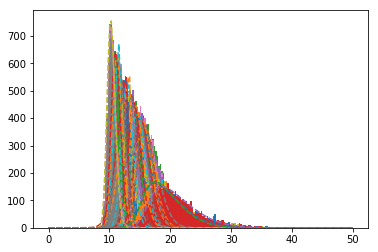

In [172]:
# This cell and the one below are for the sixth full run, using limiting flux rather than mag, and sigma ~ 10**age
x = np.linspace(0,50,200)
probs = []
for i, age in enumerate(ages):
    filename="MC_10el_FluxFit/CChi_false_{Age}.npy".format(Age=np.round(age,decimals=2))
    CChi_false = np.load(filename)
    CChi_false[1,:] = 1e11 * CChi_false[1,:]
    halt = False
    for j in range(5000):
        if np.isinf(CChi_false[1,j]):
            CChi_false[1,j] = 999999999999
            halt = True
            continue
    if halt == True:
        probs.append(0)
        continue
    try: y = plt.hist(CChi_false[1,:], bins=np.linspace(0,50,201))[0]
    except ValueError:
        probs.append(0)
        continue
    popt, pcov = curve_fit(skew, x, y, p0=(2000, 3, 2, 2))
    plt.plot(x, skew(x, *popt), '--')
    norm = integrate.quad(skew, 0, 50, args=(popt[0], popt[1], popt[2], popt[3]))[0]
    probs.append(skew(CChi[i,1], *popt)/norm)

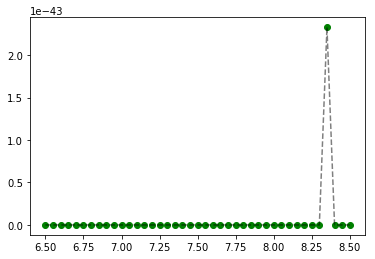

In [173]:
plt.plot(CChi[:,0], probs, 'go')
plt.plot(CChi[:,0], probs, 'k--', alpha=.5)